## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [82]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [83]:
#Read dataframe of ab data
df=pd.read_csv("ab_data.csv")

#check the top 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [84]:
#No. of rows and columns in the dataframe
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [85]:
# get the number unique users
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [86]:
#proportion of the converted users
df["converted"].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [87]:
#number of times that "new_page" and "treatment" don't match
no_treatment=df[(df["group"]=="treatment") & (df["landing_page"]!="new_page")].shape[0]
no_newpage=df[(df["group"]!="treatment") & (df["landing_page"]=="new_page")].shape[0]
no_treatment+no_newpage

3893

f. Do any of the rows have missing values?

In [88]:
#get more info about the whole dataframe data types and check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [89]:
#Drop the rows where "treatment" does not match with "new_page"
df2=df.drop(df.loc[(df["group"]=="treatment") & (df["landing_page"]!="new_page")].index,axis=0)

In [90]:
#Drop the rows where "new_page" does not match with "treatment"
df2.drop(df2.loc[(df2["group"]!="treatment") & (df2["landing_page"]=="new_page")].index,axis=0,inplace=True)

In [91]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [92]:
#number of rows in df2
df2.shape

(290585, 5)

In [93]:
#unique users in df2
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [94]:
#repeated user
df2[df2["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [95]:
#remove duplicated row
df2.drop_duplicates(subset="user_id", inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [96]:
#probability of conversion regardless the page they receive
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [97]:
#probability of conversion in "Control" group
df2[df2["group"]=="control"]["converted"].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [98]:
#probability of conversion in "treatment" group
df2[df2["group"]=="treatment"]["converted"].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [99]:
#propapility of receiving the new page
df2[df2["landing_page"]=="new_page"].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**From the data above we can conclude that, the total probability of any user to convert is just 0.1196 which is considered very small ratio.**

**Also by looking at the probability of any user to receive the new page is just 50%, and even when the user receives the new page the probability for conversion is just 0.1188 which is also very small ratio**

**Finally, the probability to convert from the old page is higher than the new page (0.12 & 0.1188 respectively). Which indicates that the new treatment page does not lead to more conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 H0: **$p_{new}$** - **$p_{old}$** <= 0
 
 H1: **$p_{new}$** - **$p_{old}$** >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [100]:
#Conversion rate
Pnew=df2["converted"].mean()
Pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [101]:
#Convertion rate assuming the old and new pages are equal
Pold=df2["converted"].mean()
Pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [102]:
#number of users in treatment group
Nnew=df2[df2["group"]=="treatment"].shape[0]
Nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [103]:
#number of users in control group
Nold=df2[df2["group"]=="control"].shape[0]
Nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [104]:
#transactions with conversion rate of Pnew under the null for Nnew
new_page_converted = np.random.choice([0,1], Nnew, p = (1-Pnew, Pnew))
new_page_converted.mean()

0.12126488197646411

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [105]:
#transactions with conversion rate of Pold under the null for Nold
old_page_converted = np.random.choice([0,1], Nold, p = (1-Pold, Pold))
old_page_converted.mean()

0.11984938805292068

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [106]:
#observation difference
new_page_converted.mean() - old_page_converted.mean()


0.0014154939235434261

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [107]:
#create 10,000 values for the difference using (np.random.binomial)
new_converted_simulation = np.random.binomial(Nnew, Pnew, 10000)/Nnew
old_converted_simulation = np.random.binomial(Nold, Pold, 10000)/Nold
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

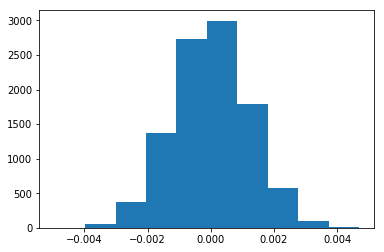

In [108]:
#Histogram for the 10,000 difference values
p_diffs=np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [109]:
#Observation difference  
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

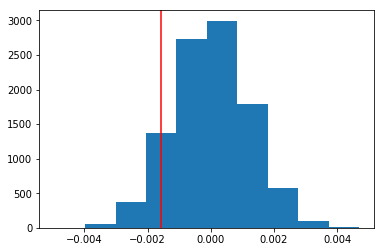

In [110]:
#histogram for null values
plt.hist(p_diffs);

#draw observed statistic
plt.axvline(obs_diff, color="r");

In [111]:
#p-value
(p_diffs > obs_diff).mean()

0.90690000000000004

#### As the p-values is greater than alpha (0.05), so we fail to reject the null hypothesis.

So we cannot accept the alternative hypothesis, so the new changes are not accepted.

**j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**So after calculating the p-value which is much greater than type I error (alpha = 0.05), we can conclude that there are no significant difference between the new and old pages**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [112]:
import statsmodels.api as sm

#number of converted users from the old and new pages
convert_old = df2[(df2["landing_page"]=="old_page") & (df2["converted"]==1)].shape[0]
convert_new = df2[(df2["landing_page"]=="new_page") & (df2["converted"]==1)].shape[0]

#number of all users using old and new pages
n_old = df2[df2["landing_page"]=="old_page"].shape[0]
n_new = df2[df2["landing_page"]=="new_page"].shape[0]

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [113]:
#Computing the test statistic and p-value 
stat,p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]),np.array([n_new, n_old]),alternative = 'larger')
stat , p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**We can find that, the z-score is -1.3109 and p-value is 0.905. That means we also failed to reject the null hypothesis**

**Also, that agrees with our findings in parts j and k**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We can use Logistic Regression Model**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [114]:
#add intercept column
df2["intercept"]=1

In [115]:
#create dummy columns for treatment and control
df_dummy=pd.get_dummies(df2["group"])

#add ab_page column to our dataframe, where 1 is "treatment" and 0 is "control"
df2["ab_page"]=df_dummy["treatment"]

In [116]:
#check our dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [117]:
#initiate logical regression model using "ab_page" column
log_model=sm.Logit(df2["converted"],df2[["intercept","ab_page"]])
result=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [118]:
#The summary of the result
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-17 07:41 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.1899 which is also larger than alpha (0.05). That confirms our findings concerning the failure in rejecting the null hypothesis**

**The difference between p-values of Part 2 and 3 is because we have performed a one-tailed test in Part 2, and in Part 3, we are performing a two-tailed test.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Actually, it may be a good idea to consider more factors to enhance our regression model as being "controlled" or "treated" are not the only factors that may affect the "conversion" process.**

**But we have to be careful while adding new factors, as adding highly directly correlated factors may lead to instability in the regression model, as adding factors depend on each other may lead to negative coefficient values which will be misleading**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [119]:
#read the new dataframe (countries)
df_countries=pd.read_csv("countries.csv")

#let's see the top 5 rows in the new dataframe
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [120]:
#join the two dataframes with respect to user_id
df2=df2.set_index("user_id").join(df_countries.set_index("user_id"),on="user_id")

In [121]:
#create dummy columns for the countries 
df2[["CA","UK","US"]]= pd.get_dummies(df2["country"])

#let's see again our dataset
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [122]:
#creating new regression model to study the effect of adding countries to our model
#Use "CA" as the baseline
log_model2=sm.Logit(df2["converted"],df2[["intercept","UK","US","ab_page"]])
result2=log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [123]:
#summary of the results of logical regression model
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-17 07:41 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

In [124]:
#Compare between users who are likely to convert from Canada to the users whom are likely to convert from UK
1/0.0506

19.76284584980237

In [125]:
#Compare between users who are likely to convert from Canada to the users whom are likely to convert from US
1/0.0408

24.509803921568626

**The result of the regression models show that the effect of conutries is not statistically significant as p-values are much higher than alpha (0.05)**

**By studying the effect of countries, we can conclude that the number of users who are likely to convert from Canada are around 19.76 times whom are likely to convert from United Kingdom**

**Also the number of users who are likely to convert from Canada are around 24.51 times whom are likely to convert from United States**


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [126]:
#Let's create regression model to look at the interaction between page and country
df2["UK_ab_page"]=df2["UK"]*df2["ab_page"]
df2["US_ab_page"]=df2["US"]*df2["ab_page"]

In [127]:
#Also use "CA" as baseline
log_model3=sm.Logit(df2["converted"],df2[["intercept","ab_page","UK","US","UK_ab_page","US_ab_page"]])
result3=log_model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [128]:
#the summary of the results
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-17 07:41 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

# Conclusion

**We can see that, even the interaction between countries and used pages is not statistically significant. So we also failed to reject the null hypothesis**

**Finally, we failed to reject the null hypothesis by all possible means, as the p-values in all cases are much higher than the type I error threshold (alpha = 0.05)**

**Our recommendation is to keep the old page, as most of conversions still happen from the old one**

>**Now let's study the effect of time on conversion rate as we will work on the daily hours to see when is the conversion most likely to occur**

**So we will divide the 24-hours day into 4 quarters every 6 hours as follows: [0 - 6] , [6 - 12] , [12 - 18] , [18 - 24]**

In [129]:
#Create dataframe for date and time
time=pd.DataFrame()
time[["date","time"]]= df2["timestamp"].str.split(expand=True)


In [130]:
#create new column for hours only
time['hour'] = pd.to_datetime(time['time'], format='%H:%M:%S.%f').dt.hour

In [131]:
#check the time dataframe
time.head()

,date,time,hour
user_id,,,
851104,2017-01-21,22:11:48.556739,22
804228,2017-01-12,08:01:45.159739,8
661590,2017-01-11,16:55:06.154213,16
853541,2017-01-08,18:28:03.143765,18
864975,2017-01-21,01:52:26.210827,1


In [132]:
#Divide the "hours" into 4 quarters every 6 hours
#Add the 4 quarters into new columns in df2 dataframe
df2["hours_intervals"]=pd.cut(time['hour'], bins=[0, 6, 12, 18, 24], include_lowest=True , labels=["0-6","6-12","12-18","18-24"])

In [133]:
#check our original dataframe "df2"
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_ab_page,US_ab_page,hours_intervals
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,18-24
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,6-12
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,12-18
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,12-18
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0-6


In [134]:
#Create dummy columns for the hours intervals
df2[["0-6","6-12","12-18","18-24"]]= pd.get_dummies(df2["hours_intervals"])

In [135]:
#check the dataframe again
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_ab_page,US_ab_page,hours_intervals,0-6,6-12,12-18,18-24
user_id,,,,,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,18-24,0,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,6-12,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,12-18,0,0,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,12-18,0,0,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0-6,1,0,0,0


In [136]:
#Propability of conversion for each quarter of hours
#probability for conversion from 0 to 6
df2["0-6"].mean()

0.29134776863144562

In [137]:
#probability for conversion from 6 to 12
df2["6-12"].mean()

0.2500309721113344

In [138]:
#probability for conversion from 12 to 18
df2["12-18"].mean()

0.25037854802742066

In [139]:
#probability for conversion from 18 to 24
df2["18-24"].mean()

0.20824271122979929

**We can find that the probabilities of conversion of users are very close for all 4 day quarters. so the hours may not be effective during our analysis**

**So let's look at the days, as all data are collected in 2017-01**

In [140]:
#so first we can remove all columns related to days to keep our dataframe clear
df2.drop(columns={"hours_intervals","0-6","6-12","12-18","18-24"},inplace=True)

In [141]:
#create new column for days only
time['days'] = pd.to_datetime(time['date'], format='%Y-%m-%d').dt.day

In [142]:
#let's see the range of days
time["days"].min() , time["days"].max()

(2, 24)

So all data collected from 2nd of January 2017 to 24th of January 2017

So let's divide the days into 4 groups every 6 days as follows: [2 - 6] , [6 - 12] , [12 - 18] , [18 - 24]

In [143]:
#Add new columns in our original dataframe (df2) for the intervals of days
df2["days_intervals"]=pd.cut(time['days'], bins=[2, 6, 12, 18, 24], include_lowest=True , labels=["days: 2-6","days: 6-12","days: 12-18","days: 18-24"])

In [144]:
#check df2 dataframe 
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,UK_ab_page,US_ab_page,days_intervals
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,days: 18-24
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,days: 6-12
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,days: 6-12
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,days: 6-12
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,days: 18-24


In [145]:
#Create dummy columns for the days intervals
df2[["days: 2-6","days: 6-12","days: 12-18","days: 18-24"]]= pd.get_dummies(df2["days_intervals"])

In [146]:
#What is the probability of the four intervals of days regardless the group? from 2-6 , 6-12 , 12-18 , 18-24 respectively
df2["days: 2-6"].mean() , df2["days: 6-12"].mean() , df2["days: 12-18"].mean() , df2["days: 18-24"].mean()

(0.20071304682983235,
 0.27431999008892438,
 0.27133634336370893,
 0.25363061971753437)

In [147]:
#so what is also the probability of conversion from new pages in the intervals of days ?!
df2[df2["landing_page"]=="new_page"]["days: 2-6"].mean() , df2[df2["landing_page"]=="new_page"]["days: 6-12"].mean() , df2[df2["landing_page"]=="new_page"]["days: 12-18"].mean() , df2[df2["landing_page"]=="new_page"]["days: 18-24"].mean()


(0.20139013144312159,
 0.27479182437547311,
 0.27074530314500034,
 0.25307274103640492)

**We can find that, the probability of conversion from the period of 2nd of Jan to 6th of Jan has the lowest probability for conversion**

**Let's try logical regression model on ab_page and days intervals (assuming days from 2 to 6 is the baseline)**

In [148]:
#initiate the logical regression model
log_model4=sm.Logit(df2["converted"],df2[["intercept","ab_page","days: 6-12","days: 12-18","days: 18-24"]])
result4=log_model4.fit()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


In [149]:
#Summary of the results
result4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-17 07:42 AIC:              212784.4967
No. Observations:   290584           BIC:              212837.3949
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0004    0.0140  -142.5861  0.0000  -2.0279  -1.9729
ab_page      -0.0150    0.0114    -1.3082  0.1908  -0.0374   0.0075
days: 6-12    0.0092    0.0168     0.5477  0.5839  -0.0238   0.0422
days: 12-18   0.0225    0.0168     1.3333  0.1824  -0.0106   0.0555
days: 18-24   0.0118    0.0171     0.6913  0.4894  -0.0217   0.0454
==================================================================

"""

**From the results of regression model, we can conclude that the days are not statistically significant as the p-values are much higher than alpha** 

# Conclusion

**Finally, we failed to reject the null hypothesis by all possible means, as the p-values in all cases are much higher than the type I error threshold (alpha = 0.05)**

**By studying the effect of countries, we can conclude that the number of users who are likely to convert from Canada are around 19.76 times whom are likely to convert from United Kingdom**

**Also the number of users who are likely to convert from Canada are around 24.51 times whom are likely to convert from United States**

**We can also find that the conversion rate from days 12 to 18 is considered the highest rate of conversion**

**So we may need more time for testing the result of the new pages, as we can see the whole data collected in just 22 days from (2nd to 24th of Jan) which is not enough to decide.**

In [150]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0